# Kickstarter Projects Datensatz

## Datensatz einlesen mit Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import dirname
import datetime as dt

notebook_path = os.path.abspath("DataAnalyticsKickstarterNotebook_Cedrik.ipynb")
csv_path = os.path.join(os.path.dirname(dirname(notebook_path)), "data/ks-projects-201801.csv")

In [2]:
df = pd.read_csv (csv_path, low_memory=False)
df.set_index('ID', inplace = True)
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## Datensatz analysieren

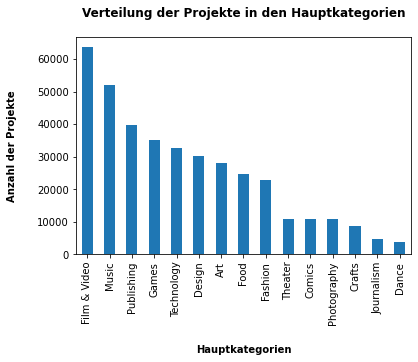

In [3]:
df['main_category'].nunique()
## df['main_category'].hist(figsize=(20,10))
df['main_category'].value_counts().plot(kind='bar')
plt.title("Verteilung der Projekte in den Hauptkategorien", fontweight="bold", fontsize=12, pad=20)
#plt.title("Distribution of the projects in different main categories", fontweight="bold", fontsize=12, pad=20)
plt.xlabel('Hauptkategorien', fontweight="bold", labelpad=20)
#plt.xlabel('Main categories', fontweight="bold", labelpad=20)
plt.ylabel("Anzahl der Projekte", fontweight="bold", labelpad=20)
#plt.ylabel("Number of projects", fontweight="bold", labelpad=20)
plt.savefig(os.path.join(os.path.dirname(dirname(notebook_path)), "pictures/maincategories.png"),bbox_inches = "tight")
plt.show()

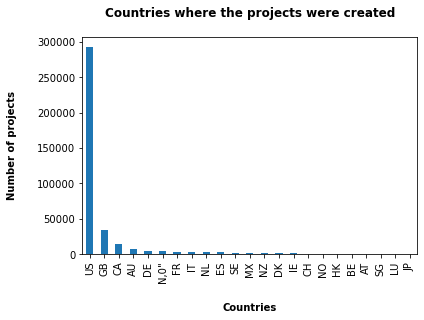

In [4]:
df['country'].nunique()

df['country'].value_counts().plot(kind='bar')
#plt.title("Länder in denen Projekte gestartet wurden", fontweight="bold", fontsize=12, pad=20)
plt.title("Countries where the projects were created", fontweight="bold", fontsize=12, pad=20)
#plt.xlabel('Länder', fontweight="bold", labelpad=20)
plt.xlabel('Countries', fontweight="bold", labelpad=20)
#plt.ylabel("Anzahl der Projekte", fontweight="bold", labelpad=20)
plt.ylabel("Number of projects", fontweight="bold", labelpad=20)
plt.savefig(os.path.join(os.path.dirname(dirname(notebook_path)), "pictures/countries.png"),bbox_inches = "tight")
plt.show()

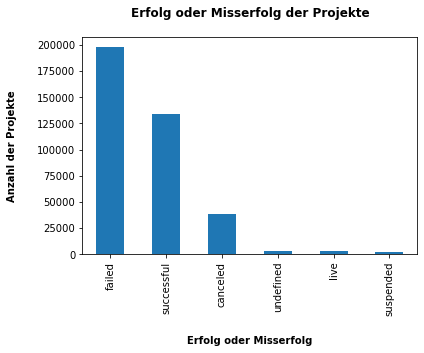

In [5]:
df['state'].nunique()

df['state'].value_counts().plot(kind='bar')
plt.title("Erfolg oder Misserfolg der Projekte", fontweight="bold", fontsize=12, pad=20)
plt.xlabel('Erfolg oder Misserfolg', fontweight="bold", labelpad=20)
plt.ylabel("Anzahl der Projekte", fontweight="bold", labelpad=20)
plt.show()

In [6]:
df['main_category'].value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

# Zeitstrahl wie viele Projekte über die Jahre gestartet wurden

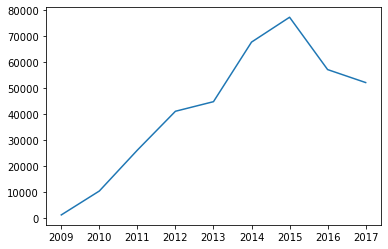

In [7]:
# Get all launch years
df['launched'] = pd.to_datetime(df['launched'])
launchYears = df['launched'].dt.year.unique()
launchYears = np.sort(launchYears) 
launchYears = np.delete(launchYears, [0,10])
launchesPerYearArray = []

for year in launchYears:
    
    launchedProjects = df[df['launched'].dt.year == year]
    numberOflaunchedProjects = launchedProjects.shape[0]
    launchesPerYearArray.append(numberOflaunchedProjects)

launchesPerYearNpArray = np.array(launchesPerYearArray)
plt.plot(launchYears, launchesPerYearNpArray) 




## Anforderungen an Projektumsetzung: NumPy und pandas
Falls die Anforderungen auf den eigenen Projektdatensatz nicht anwendbar sind, gibt es folgende Möglichkeiten:

Datensatz um passende Daten erweitern entweder manuell, per Anspielen aus weiterer Datenquelle oder zur Not per zufälliger Datengenerierung/-simulation
Datensatz außerhalb des Projekts wählen und Anforderungen daran umsetzen

### Anforderungen:

    1. Erstellen Sie NumPy-Arrays mit (Teil-)Daten aus Ihrem Projekt - es sollten verschiedene Datentypen (Ganzzahl, Kommazahl, String, Boolean, etc.) vorhanden sein
    2. Filtern Sie ein NumPy-Array basierend auf mindestens 2 Bedingungen auf mindestens 2 Arrays/Spalten
    3. Berechnen Sie mind. 2 Statistiken auf mind. 2 Arrays
    4. Laden Sie eine Datei von der Festplatte oder einer URL als pandas-DataFrame
    5. Fügen Sie mindestens eine neue Spalte hinzu, die aus mindestens einer anderen Spalte berechnet wurde
    6. Ändern Sie Reihenfolge und Benennung der Spalten
    7. Löschen Sie mindestens eine Spalte
    8. Verwenden Sie mindestens eine Funktion aus dem str-Accessor
    9. Speichern Sie Ihr pandas DataFrame in eine Datei

### Anforderung 1

In [8]:
# Ermittlung der verschiedenen Datentypen der Spalten
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              378657 non-null  object        
 1   category          378661 non-null  object        
 2   main_category     378661 non-null  object        
 3   currency          378661 non-null  object        
 4   deadline          378661 non-null  object        
 5   goal              378661 non-null  float64       
 6   launched          378661 non-null  datetime64[ns]
 7   pledged           378661 non-null  float64       
 8   state             378661 non-null  object        
 9   backers           378661 non-null  int64         
 10  country           378661 non-null  object        
 11  usd pledged       374864 non-null  float64       
 12  usd_pledged_real  378661 non-null  float64       
 13  usd_goal_real     378661 non-null  float64     

In [9]:
# Umwandlung des Dataframes in ein NumPy-Array
df_numpyArray = df.to_numpy()
print(type(df_numpyArray))

<class 'numpy.ndarray'>


In [10]:
# Erstellen von NumPy-Arrays aus Teildaten mit verschiedenen Datentypen
names = df_numpyArray[:,0]
main_categories = df_numpyArray[:,2]
launchDates = df_numpyArray[:,6].astype(np.datetime64)
states = df_numpyArray[:,8]
backers = df_numpyArray[:,9]
pledged = df_numpyArray[:,12].astype(np.float64)
goals = df_numpyArray[:,13].astype(np.float64)
launchDates

array(['2015-08-11T12:12:28.000000', '2017-09-02T04:43:57.000000',
       '2013-01-12T00:20:50.000000', ..., '2010-07-01T19:40:30.000000',
       '2016-01-13T18:13:53.000000', '2011-07-19T09:07:47.000000'],
      dtype='datetime64[us]')

### Anforderung 2

In [11]:
# Filtern der Kickstarter Projekte nach erfolgreichen Projekten
filt_successful = states == 'successful'
filtStates_names = names[filt_successful]
print(f'Anzahl der erfolgreichen Kickstarter Projekte: {filtStates_names.size}')
print('------------------------------------------------------------')
print('NumPy-Array mit den erfolgreichen Kickstarter Projekten:')
print(filtStates_names)

Anzahl der erfolgreichen Kickstarter Projekte: 133956
------------------------------------------------------------
NumPy-Array mit den erfolgreichen Kickstarter Projekten:
['Monarch Espresso Bar'
 'Support Solar Roasted Coffee & Green Energy!  SolarCoffee.co'
 'Lisa Lim New CD!' ... 'The Dog Coffee Book' 'AT THE BEACH'
 'Beach Wrestling Documentary']


In [12]:
# Filtern der Kickstarter Projekte nach dem Startdatum
filt_launchYear = (launchDates.astype('datetime64[Y]').astype(int) + 1970) == 2017
filtLaunch_names = names[filt_launchYear]
print(f'Anzahl der gestarteten Kickstarter Projekte im Jahr 2017: {filtLaunch_names.size}')
print('------------------------------------------------------------')
print('NumPy-Array mit den gestarteten Kickstarter Projekten im Jahr 2017:')
print(filtLaunch_names)

Anzahl der gestarteten Kickstarter Projekte im Jahr 2017: 52200
------------------------------------------------------------
NumPy-Array mit den gestarteten Kickstarter Projekten im Jahr 2017:
['Greeting From Earth: ZGAC Arts Capsule For ET'
 'Tombstone: Old West tabletop game and miniatures in 32mm.'
 'MikeyJ clothing brand fundraiser' ...
 'ÉPOUVANTAILS : 28mm Figurines de jeux pour KINGS OF WAR'
 'Colorado International Activism Film Festival'
 'Homemade fresh dog food, Cleveland OH']


### Anfoderung 3

In [13]:
# Ermitteln des höchsten Betrags, 
# der für ein Kickstarter Projekt investiert wurde

print(f'Für das Projekt {names[np.argmax(pledged)]} wurden insgesamt {pledged[np.argmax(pledged)]} $ investiert.')

Für das Projekt Pebble Time - Awesome Smartwatch, No Compromises wurden insgesamt 20338986.27 $ investiert.


In [14]:
# Ermitteln des Zielbetrags, welcher durchschnittlich für ein Projekt
# in der Kategorie Film und Video angegeben wird

np.average(pledged[main_categories == 'Film & Video'])

6157.978427459307

### Anforderung 4

Eine Datei wurde bereits in Zelle 4 von der Festplatte in ein pandas-DataFrame geladen

### Anforderung 5

In [15]:
# Neue Spalte mit der Dauer der Projekte vom Launchdatum bis zur Deadline
df['duration'] = pd.to_datetime(df['deadline']).dt.date - pd.to_datetime(df['launched']).dt.date
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,59 days
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,60 days
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,45 days
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,30 days
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,56 days


### Anforderung 6

In [16]:
# Ermitteln der Postionen der Spalten launched und deadline
pos_launched = df.columns.get_loc('launched')
pos_deadline = df.columns.get_loc('deadline')
print(f'{pos_launched} , {pos_deadline}')

6 , 4


In [17]:
# Ändern der Reihenfolge der Spalten
df.iloc[: ,[0,1,2,3,5,7,8,9,10,11,12,13,6,4,14]]

,name,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched,deadline,duration
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95,2015-08-11 12:12:28,2015-10-09,59 days
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00,2017-09-02 04:43:57,2017-11-01,60 days
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,45000.0,220.0,failed,3,US,220.0,220.0,45000.00,2013-01-12 00:20:50,2013-02-26,45 days
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,5000.0,1.0,failed,1,US,1.0,1.0,5000.00,2012-03-17 03:24:11,2012-04-16,30 days
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,19500.0,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015-07-04 08:35:03,2015-08-29,56 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,50000.0,25.0,canceled,1,US,25.0,25.0,50000.00,2014-09-17 02:35:30,2014-10-17,30 days
999977640,The Tribe,Narrative Film,Film & Video,USD,1500.0,155.0,failed,5,US,155.0,155.0,1500.00,2011-06-22 03:35:14,2011-07-19,27 days
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,15000.0,20.0,failed,1,US,20.0,20.0,15000.00,2010-07-01 19:40:30,2010-08-16,46 days


In [18]:
# Umbenennung der Spalte launched in launch_date
df.rename(columns={"launched": "launch_date"})

,name,category,main_category,currency,deadline,goal,launch_date,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,59 days
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,60 days
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,45 days
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,30 days
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,56 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00,30 days
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00,27 days
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00,46 days


### Anforderung 7

In [19]:
# Löschen der zuvor erstellten Spalte duration
df_drop = df.drop(columns=['duration'])
df_drop.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Anforderung 8

In [20]:
# Die Spalte duration in einen String umwandeln für Operation mit dem str-Accessor
df['duration'] = df['duration'].astype(str)
df['duration']

ID
1000002330    59 days
1000003930    60 days
1000004038    45 days
1000007540    30 days
1000011046    56 days
               ...   
999976400     30 days
999977640     27 days
999986353     46 days
999987933     31 days
999988282     28 days
Name: duration, Length: 378661, dtype: object

In [21]:
# Den String "days" aus der Spalte duration entfernen
df['duration'] = df['duration'].str.replace('days','')

### Anforderung 9

In [22]:
df.to_csv(os.path.join(os.path.dirname(dirname(notebook_path)), "data/ks-project-edited-numpy-pandas.csv"))